In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

# Functions
----

In [15]:
#useful functions

def load_biopsy():
    # import data
    biopsy = pd.read_csv('biopsy.csv', na_values='?', dtype={'ID': str}).dropna().reset_index()
    
    # Split in training and test data
    trainI = np.random.choice(biopsy.shape[0], size=300, replace=False)    
    trainIndex=biopsy.index.isin(trainI)    
    train=biopsy.iloc[trainIndex] # training set
    test=biopsy.iloc[~trainIndex] # test set    
    
    # Extract relevant data features
    X_train = train[['V1','V2','V3','V4','V5','V6','V7','V8','V9']].values
    X_test = test[['V1','V2','V3','V4','V5','V6','V7','V8','V9']].values    
    Y_train=(train['class']=='malignant').astype(int).values.reshape((-1,1))
    Y_test=(test['class']=='malignant').astype(int).values.reshape((-1,1))
    
    return X_train, Y_train, X_test, Y_test


class LogReg():
    """
    Logistic regression implementation for classification problems
    """
    def __init__(self):
        print("Model Initialized\nCall .fit(x,y) to start the training process\n")
        pass
    
    def sigmoid(self,x):
        """
        Compute the sigmoid of x
        """
        s = lambda a: 1 / (1 + np.exp(-a))
        return s(x)      
        
    def eval_cost(self):
        """
        Evaluate probabilites, loss and cost function
        """
        self.z=[]
        for i in range(len(self.y)):
            self.z.append(np.add(np.matmul(self.w.T,self.x[i]),self.b))
        self.z=np.array(self.z)
        self.p=np.reshape(self.sigmoid(self.z),-1)
        self.p2=np.subtract(1,self.p)
        self.prob=np.stack((self.p2,self.p),axis=-1)
        self.loss=-np.add(np.multiply(self.y,np.log(self.p)),
                         np.multiply(np.subtract(1,self.y),np.log(np.subtract(1,self.p))))
        self.cost=np.sum(self.loss)/self.n
        #self.z=np.add(np.matmul(self.w.T,self.x),self.b)
        #print(self.n,self.dim)
        #print(self.w,self.b)
        #print(sigmoid(self.z))
        #print(self.loss.shape)
        #print(self.cost)
              
    def test_eval_cost(self):
        """
        Evaluate probabilites, loss and cost function for test data during training process
        """
        self.z_test=[]
        for i in range(len(self.y_test)):
            self.z_test.append(np.add(np.matmul(self.w.T,self.x_test[i]),self.b))
        self.z_test=np.array(self.z_test)
        self.p_test=np.reshape(self.sigmoid(self.z_test),-1)
        self.p2_test=np.subtract(1,self.p_test)
        self.prob_test=np.stack((self.p2_test,self.p_test),axis=-1)
        self.loss_test=-np.add(np.multiply(self.y_test,np.log(self.p_test)),
                         np.multiply(np.subtract(1,self.y_test),np.log(np.subtract(1,self.p_test))))
        self.cost_test=np.sum(self.loss_test)/self.n_test
        #self.z=np.add(np.matmul(self.w.T,self.x),self.b)
        #print(self.n,self.dim)
        #print(self.w,self.b)
        #print(sigmoid(self.z))
        #print(self.loss.shape)
        #print(self.cost)    
    
    def gradient(self):
        """
        Evaluate the gradient for training purpose
        """
        self.J_z = np.subtract(self.p.reshape(-1),self.y) #/self.n
        self.J_w=[]
        for i in range(np.shape(self.x)[-1]):
            self.J_w.append(np.sum(np.multiply(self.J_z,self.x[:,i])))
        self.J_b=np.sum(np.array(self.J_z))/self.n
        self.J_w=np.array(self.J_w)/self.n
        #print(self.J_w.shape)
        #print(self.J_b.shape)
    
    def accuracy(self):
        """
        Compute accuracy, false posivites and false negatives
        """
        tot=0
        self.fp=0
        self.fn=0
        for i in range(len(self.p)):
            temp=self.y[i]-(self.prob[i].argmax())
            if temp == -1:
                self.fp+=1
            elif temp == 1:
                self.fn+=1
        tot=self.fn+self.fp
        self.acc=1.0-tot/float(len(self.p))
    
    def test_accuracy(self):
        """
        Compute accuracy, false posivites and false negatives for test data during training process
        """
        tot=0
        self.fp_test=0
        self.fn_test=0
        for i in range(len(self.p_test)):
            temp=self.y_test[i]-(self.prob_test[i].argmax())
            if temp == -1:
                self.fp_test+=1
            elif temp == 1:
                self.fn_test+=1
        tot=self.fn_test+self.fp_test
        self.acc_test=1.0-tot/float(len(self.p_test))
        
        
    def fit(self,x,y,niter=100,lr=0.1,verbose=True,dc=True,test=None):
        """
        Execute the training process updating the parameters
        Give test in list format [X_test,Y_test]
        """
        #initialize variables
        self.x=x
        self.y=np.reshape(y,-1)
        self.n=np.shape(y)[0]
        self.dim=np.shape(x)[-1]
        self.w=np.random.randn(self.dim)
        self.b=np.random.randn(1)
        self.e_history=[]
        self.acc_history=[]
        self.fp_history=[]
        self.fn_history=[]
        #initial values
        self.eval_cost()
        self.gradient()
        #check parameters
        if verbose == True:
            print("Initial Cost:",self.cost)
        if dc == True:
            rate=lr/niter  
        if test is not None:
            #initialize test variables
            self.x_test=test[0]
            self.y_test=np.reshape(test[1],-1)
            self.n_test=np.shape(self.y_test)[0]
            self.dim=np.shape(self.x_test)[-1]
            self.e_history_test=[]
            self.acc_history_test=[]
            self.fp_history_test=[]
            self.fn_history_test=[]        
        #starting optimization
        for it in range(niter):
            #for i in range(self.y.shape[-1]):
            self.w = self.w - lr*self.J_w #[:,i]
            self.b = self.b - lr*self.J_b #[i]
            self.eval_cost()
            self.gradient()
            lr = lr*(1-rate) if dc == True else lr
            self.accuracy()
            if test is not None:
                self.test_eval_cost()
                self.test_accuracy()
                print("Iter %2d --- Cost: %.3f | Acc: %.3f  //-\\\\  Test_Cost: %.3f | Test_Acc: %.3f" %
                       (it+1,self.cost,self.acc,self.cost_test,self.acc_test)) if verbose==True else None
                self.e_history.append(self.cost)
                self.acc_history.append(self.acc)
                self.fp_history.append(self.fp)
                self.fn_history.append(self.fn)
                self.e_history_test.append(self.cost_test)
                self.acc_history_test.append(self.acc_test)
                self.fp_history_test.append(self.fp_test)
                self.fn_history_test.append(self.fn_test)
            else:
                print("Iter %2d --- Cost: %.3f | Acc: %.3f" % (it+1,self.cost,self.acc)) if verbose==True else None
                self.e_history.append(self.cost)
                self.acc_history.append(self.acc)
                self.fp_history.append(self.fp)
                self.fn_history.append(self.fn)
        #return summary in dict format
            if test is not None:
                dic= {'Iterations':niter,
                        'Error':self.e_history,
                        'Accuracy':self.acc_history,
                        'FalsePositives':self.fp_history,
                        'FalseNegatives':self.fn_history,
                        'TestError':self.e_history_test,
                        'TestAccuracy':self.acc_history_test,
                        'TestFalsePositives':self.fp_history_test,
                        'TestFalseNegatives':self.fn_history_test}
            else:
                dic= {'Iterations':niter,
                        'Error':self.e_history,
                        'Accuracy':self.acc_history,
                        'FalsePositives':self.fp_history,
                        'FalseNegatives':self.fn_history}        
        return dic

    def evaluate(self,x,y):
        """
        Return the p[i] values for input data and print scores
        """
        #initialize variables
        self.x=x
        self.y=np.reshape(y,-1)
        self.n=np.shape(self.y)[0]
        self.dim=np.shape(self.x)[-1]
        self.z=[]
        for i in range(len(self.y)):
            self.z.append(np.add(np.matmul(self.w.T,self.x[i]),self.b))
        self.z=np.array(self.z)
        self.p=np.reshape(self.sigmoid(self.z),-1)
        self.p2=np.subtract(1,self.p)
        #probabilites for class 0 and 1
        self.prob=np.stack((self.p2,self.p),axis=-1)
        #scores
        self.eval_cost()
        self.accuracy()
        #Print scores
        print("\nLoss: ",self.cost)
        print("Accuracy: ",self.acc,"\n")
        print("False Posivites: ",self.fp)
        print("False Negatives: ",self.fn,"\n")
        
        return self.prob
        
    def predict(self,xin):
        """
        Return the p[i] values for predictions
        """
        #initialize variables
        self.x=xin
        self.z=[]
        for i in range(len(self.xin)):
            self.z.append(np.add(np.matmul(self.w.T,self.xin[i]),self.b))
        self.z=np.array(self.z)
        self.p=np.reshape(self.sigmoid(self.z),-1)
        self.p2=np.subtract(1,self.p)
        #probabilites for class 0 and 1
        self.prob=np.stack((self.p2,self.p),axis=-1)
        return self.prob


# Loading data
----

In [16]:
#get the training and test data
X_train, Y_train, X_test, Y_test = load_biopsy()
#checking shapes
print('Training input: ', X_train.shape)
print('Training target: ', Y_train.shape)
print('Test input: ', X_test.shape)
print('Test target: ', Y_test.shape)

Training input:  (300, 9)
Training target:  (300, 1)
Test input:  (383, 9)
Test target:  (383, 1)


# Starting the training process
----

In [17]:
classifier = LogReg()

Model Initialized
Call .fit(x,y) to start the training process



In [19]:
history=classifier.fit(X_train,Y_train,niter=2000,test=[X_test,Y_test])

Initial Cost: 1.7581665500540158
Iter  1 --- Cost: 1.375 | Acc: 0.323  //-\\  Test_Cost: 1.311 | Test_Acc: 0.313
Iter  2 --- Cost: 1.273 | Acc: 0.343  //-\\  Test_Cost: 1.213 | Test_Acc: 0.389
Iter  3 --- Cost: 1.202 | Acc: 0.357  //-\\  Test_Cost: 1.137 | Test_Acc: 0.399
Iter  4 --- Cost: 1.138 | Acc: 0.397  //-\\  Test_Cost: 1.071 | Test_Acc: 0.431
Iter  5 --- Cost: 1.079 | Acc: 0.413  //-\\  Test_Cost: 1.010 | Test_Acc: 0.444
Iter  6 --- Cost: 1.025 | Acc: 0.447  //-\\  Test_Cost: 0.955 | Test_Acc: 0.491
Iter  7 --- Cost: 0.976 | Acc: 0.457  //-\\  Test_Cost: 0.906 | Test_Acc: 0.520
Iter  8 --- Cost: 0.930 | Acc: 0.470  //-\\  Test_Cost: 0.861 | Test_Acc: 0.538
Iter  9 --- Cost: 0.888 | Acc: 0.493  //-\\  Test_Cost: 0.820 | Test_Acc: 0.569
Iter 10 --- Cost: 0.849 | Acc: 0.543  //-\\  Test_Cost: 0.783 | Test_Acc: 0.645
Iter 11 --- Cost: 0.813 | Acc: 0.570  //-\\  Test_Cost: 0.749 | Test_Acc: 0.661
Iter 12 --- Cost: 0.780 | Acc: 0.580  //-\\  Test_Cost: 0.718 | Test_Acc: 0.674
Iter 13

Iter 120 --- Cost: 0.242 | Acc: 0.947  //-\\  Test_Cost: 0.247 | Test_Acc: 0.935
Iter 121 --- Cost: 0.241 | Acc: 0.947  //-\\  Test_Cost: 0.246 | Test_Acc: 0.935
Iter 122 --- Cost: 0.240 | Acc: 0.947  //-\\  Test_Cost: 0.246 | Test_Acc: 0.935
Iter 123 --- Cost: 0.240 | Acc: 0.947  //-\\  Test_Cost: 0.245 | Test_Acc: 0.935
Iter 124 --- Cost: 0.239 | Acc: 0.947  //-\\  Test_Cost: 0.245 | Test_Acc: 0.935
Iter 125 --- Cost: 0.238 | Acc: 0.947  //-\\  Test_Cost: 0.244 | Test_Acc: 0.935
Iter 126 --- Cost: 0.238 | Acc: 0.947  //-\\  Test_Cost: 0.244 | Test_Acc: 0.935
Iter 127 --- Cost: 0.237 | Acc: 0.947  //-\\  Test_Cost: 0.243 | Test_Acc: 0.935
Iter 128 --- Cost: 0.236 | Acc: 0.950  //-\\  Test_Cost: 0.243 | Test_Acc: 0.937
Iter 129 --- Cost: 0.236 | Acc: 0.950  //-\\  Test_Cost: 0.242 | Test_Acc: 0.937
Iter 130 --- Cost: 0.235 | Acc: 0.950  //-\\  Test_Cost: 0.242 | Test_Acc: 0.937
Iter 131 --- Cost: 0.234 | Acc: 0.950  //-\\  Test_Cost: 0.241 | Test_Acc: 0.937
Iter 132 --- Cost: 0.234 | A

Iter 229 --- Cost: 0.193 | Acc: 0.953  //-\\  Test_Cost: 0.209 | Test_Acc: 0.950
Iter 230 --- Cost: 0.193 | Acc: 0.957  //-\\  Test_Cost: 0.208 | Test_Acc: 0.950
Iter 231 --- Cost: 0.192 | Acc: 0.957  //-\\  Test_Cost: 0.208 | Test_Acc: 0.950
Iter 232 --- Cost: 0.192 | Acc: 0.957  //-\\  Test_Cost: 0.208 | Test_Acc: 0.950
Iter 233 --- Cost: 0.192 | Acc: 0.957  //-\\  Test_Cost: 0.208 | Test_Acc: 0.950
Iter 234 --- Cost: 0.192 | Acc: 0.957  //-\\  Test_Cost: 0.207 | Test_Acc: 0.950
Iter 235 --- Cost: 0.191 | Acc: 0.957  //-\\  Test_Cost: 0.207 | Test_Acc: 0.950
Iter 236 --- Cost: 0.191 | Acc: 0.957  //-\\  Test_Cost: 0.207 | Test_Acc: 0.950
Iter 237 --- Cost: 0.191 | Acc: 0.957  //-\\  Test_Cost: 0.207 | Test_Acc: 0.950
Iter 238 --- Cost: 0.190 | Acc: 0.957  //-\\  Test_Cost: 0.206 | Test_Acc: 0.950
Iter 239 --- Cost: 0.190 | Acc: 0.957  //-\\  Test_Cost: 0.206 | Test_Acc: 0.950
Iter 240 --- Cost: 0.190 | Acc: 0.957  //-\\  Test_Cost: 0.206 | Test_Acc: 0.950
Iter 241 --- Cost: 0.189 | A

Iter 344 --- Cost: 0.165 | Acc: 0.967  //-\\  Test_Cost: 0.185 | Test_Acc: 0.956
Iter 345 --- Cost: 0.165 | Acc: 0.967  //-\\  Test_Cost: 0.184 | Test_Acc: 0.956
Iter 346 --- Cost: 0.164 | Acc: 0.967  //-\\  Test_Cost: 0.184 | Test_Acc: 0.956
Iter 347 --- Cost: 0.164 | Acc: 0.967  //-\\  Test_Cost: 0.184 | Test_Acc: 0.956
Iter 348 --- Cost: 0.164 | Acc: 0.967  //-\\  Test_Cost: 0.184 | Test_Acc: 0.956
Iter 349 --- Cost: 0.164 | Acc: 0.967  //-\\  Test_Cost: 0.184 | Test_Acc: 0.956
Iter 350 --- Cost: 0.164 | Acc: 0.967  //-\\  Test_Cost: 0.184 | Test_Acc: 0.956
Iter 351 --- Cost: 0.163 | Acc: 0.967  //-\\  Test_Cost: 0.183 | Test_Acc: 0.956
Iter 352 --- Cost: 0.163 | Acc: 0.967  //-\\  Test_Cost: 0.183 | Test_Acc: 0.956
Iter 353 --- Cost: 0.163 | Acc: 0.967  //-\\  Test_Cost: 0.183 | Test_Acc: 0.956
Iter 354 --- Cost: 0.163 | Acc: 0.967  //-\\  Test_Cost: 0.183 | Test_Acc: 0.956
Iter 355 --- Cost: 0.163 | Acc: 0.967  //-\\  Test_Cost: 0.183 | Test_Acc: 0.956
Iter 356 --- Cost: 0.162 | A

Iter 463 --- Cost: 0.145 | Acc: 0.963  //-\\  Test_Cost: 0.168 | Test_Acc: 0.958
Iter 464 --- Cost: 0.145 | Acc: 0.963  //-\\  Test_Cost: 0.167 | Test_Acc: 0.958
Iter 465 --- Cost: 0.145 | Acc: 0.963  //-\\  Test_Cost: 0.167 | Test_Acc: 0.958
Iter 466 --- Cost: 0.145 | Acc: 0.963  //-\\  Test_Cost: 0.167 | Test_Acc: 0.958
Iter 467 --- Cost: 0.145 | Acc: 0.963  //-\\  Test_Cost: 0.167 | Test_Acc: 0.958
Iter 468 --- Cost: 0.144 | Acc: 0.963  //-\\  Test_Cost: 0.167 | Test_Acc: 0.958
Iter 469 --- Cost: 0.144 | Acc: 0.963  //-\\  Test_Cost: 0.167 | Test_Acc: 0.958
Iter 470 --- Cost: 0.144 | Acc: 0.963  //-\\  Test_Cost: 0.167 | Test_Acc: 0.958
Iter 471 --- Cost: 0.144 | Acc: 0.963  //-\\  Test_Cost: 0.167 | Test_Acc: 0.958
Iter 472 --- Cost: 0.144 | Acc: 0.963  //-\\  Test_Cost: 0.166 | Test_Acc: 0.958
Iter 473 --- Cost: 0.144 | Acc: 0.963  //-\\  Test_Cost: 0.166 | Test_Acc: 0.958
Iter 474 --- Cost: 0.144 | Acc: 0.963  //-\\  Test_Cost: 0.166 | Test_Acc: 0.958
Iter 475 --- Cost: 0.143 | A

Iter 573 --- Cost: 0.132 | Acc: 0.960  //-\\  Test_Cost: 0.156 | Test_Acc: 0.961
Iter 574 --- Cost: 0.132 | Acc: 0.960  //-\\  Test_Cost: 0.156 | Test_Acc: 0.961
Iter 575 --- Cost: 0.132 | Acc: 0.960  //-\\  Test_Cost: 0.156 | Test_Acc: 0.961
Iter 576 --- Cost: 0.131 | Acc: 0.960  //-\\  Test_Cost: 0.156 | Test_Acc: 0.961
Iter 577 --- Cost: 0.131 | Acc: 0.960  //-\\  Test_Cost: 0.156 | Test_Acc: 0.961
Iter 578 --- Cost: 0.131 | Acc: 0.960  //-\\  Test_Cost: 0.156 | Test_Acc: 0.961
Iter 579 --- Cost: 0.131 | Acc: 0.960  //-\\  Test_Cost: 0.156 | Test_Acc: 0.961
Iter 580 --- Cost: 0.131 | Acc: 0.960  //-\\  Test_Cost: 0.156 | Test_Acc: 0.961
Iter 581 --- Cost: 0.131 | Acc: 0.960  //-\\  Test_Cost: 0.156 | Test_Acc: 0.961
Iter 582 --- Cost: 0.131 | Acc: 0.960  //-\\  Test_Cost: 0.156 | Test_Acc: 0.961
Iter 583 --- Cost: 0.131 | Acc: 0.960  //-\\  Test_Cost: 0.155 | Test_Acc: 0.961
Iter 584 --- Cost: 0.131 | Acc: 0.960  //-\\  Test_Cost: 0.155 | Test_Acc: 0.961
Iter 585 --- Cost: 0.130 | A

Iter 681 --- Cost: 0.122 | Acc: 0.963  //-\\  Test_Cost: 0.148 | Test_Acc: 0.963
Iter 682 --- Cost: 0.122 | Acc: 0.963  //-\\  Test_Cost: 0.148 | Test_Acc: 0.963
Iter 683 --- Cost: 0.121 | Acc: 0.963  //-\\  Test_Cost: 0.148 | Test_Acc: 0.963
Iter 684 --- Cost: 0.121 | Acc: 0.963  //-\\  Test_Cost: 0.148 | Test_Acc: 0.963
Iter 685 --- Cost: 0.121 | Acc: 0.963  //-\\  Test_Cost: 0.148 | Test_Acc: 0.963
Iter 686 --- Cost: 0.121 | Acc: 0.963  //-\\  Test_Cost: 0.148 | Test_Acc: 0.963
Iter 687 --- Cost: 0.121 | Acc: 0.963  //-\\  Test_Cost: 0.148 | Test_Acc: 0.963
Iter 688 --- Cost: 0.121 | Acc: 0.963  //-\\  Test_Cost: 0.148 | Test_Acc: 0.963
Iter 689 --- Cost: 0.121 | Acc: 0.963  //-\\  Test_Cost: 0.148 | Test_Acc: 0.963
Iter 690 --- Cost: 0.121 | Acc: 0.963  //-\\  Test_Cost: 0.148 | Test_Acc: 0.963
Iter 691 --- Cost: 0.121 | Acc: 0.963  //-\\  Test_Cost: 0.148 | Test_Acc: 0.963
Iter 692 --- Cost: 0.121 | Acc: 0.963  //-\\  Test_Cost: 0.148 | Test_Acc: 0.963
Iter 693 --- Cost: 0.121 | A

Iter 783 --- Cost: 0.114 | Acc: 0.963  //-\\  Test_Cost: 0.142 | Test_Acc: 0.963
Iter 784 --- Cost: 0.114 | Acc: 0.963  //-\\  Test_Cost: 0.142 | Test_Acc: 0.963
Iter 785 --- Cost: 0.114 | Acc: 0.963  //-\\  Test_Cost: 0.142 | Test_Acc: 0.963
Iter 786 --- Cost: 0.114 | Acc: 0.963  //-\\  Test_Cost: 0.142 | Test_Acc: 0.963
Iter 787 --- Cost: 0.114 | Acc: 0.963  //-\\  Test_Cost: 0.142 | Test_Acc: 0.963
Iter 788 --- Cost: 0.114 | Acc: 0.963  //-\\  Test_Cost: 0.142 | Test_Acc: 0.963
Iter 789 --- Cost: 0.114 | Acc: 0.963  //-\\  Test_Cost: 0.142 | Test_Acc: 0.963
Iter 790 --- Cost: 0.113 | Acc: 0.963  //-\\  Test_Cost: 0.142 | Test_Acc: 0.963
Iter 791 --- Cost: 0.113 | Acc: 0.963  //-\\  Test_Cost: 0.142 | Test_Acc: 0.963
Iter 792 --- Cost: 0.113 | Acc: 0.963  //-\\  Test_Cost: 0.142 | Test_Acc: 0.963
Iter 793 --- Cost: 0.113 | Acc: 0.963  //-\\  Test_Cost: 0.142 | Test_Acc: 0.963
Iter 794 --- Cost: 0.113 | Acc: 0.963  //-\\  Test_Cost: 0.142 | Test_Acc: 0.963
Iter 795 --- Cost: 0.113 | A

Iter 893 --- Cost: 0.107 | Acc: 0.963  //-\\  Test_Cost: 0.138 | Test_Acc: 0.963
Iter 894 --- Cost: 0.107 | Acc: 0.963  //-\\  Test_Cost: 0.138 | Test_Acc: 0.963
Iter 895 --- Cost: 0.107 | Acc: 0.963  //-\\  Test_Cost: 0.137 | Test_Acc: 0.963
Iter 896 --- Cost: 0.107 | Acc: 0.963  //-\\  Test_Cost: 0.137 | Test_Acc: 0.963
Iter 897 --- Cost: 0.107 | Acc: 0.963  //-\\  Test_Cost: 0.137 | Test_Acc: 0.963
Iter 898 --- Cost: 0.107 | Acc: 0.963  //-\\  Test_Cost: 0.137 | Test_Acc: 0.963
Iter 899 --- Cost: 0.107 | Acc: 0.963  //-\\  Test_Cost: 0.137 | Test_Acc: 0.963
Iter 900 --- Cost: 0.107 | Acc: 0.963  //-\\  Test_Cost: 0.137 | Test_Acc: 0.963
Iter 901 --- Cost: 0.107 | Acc: 0.963  //-\\  Test_Cost: 0.137 | Test_Acc: 0.963
Iter 902 --- Cost: 0.107 | Acc: 0.963  //-\\  Test_Cost: 0.137 | Test_Acc: 0.963
Iter 903 --- Cost: 0.107 | Acc: 0.963  //-\\  Test_Cost: 0.137 | Test_Acc: 0.963
Iter 904 --- Cost: 0.107 | Acc: 0.963  //-\\  Test_Cost: 0.137 | Test_Acc: 0.963
Iter 905 --- Cost: 0.107 | A

Iter 1010 --- Cost: 0.101 | Acc: 0.963  //-\\  Test_Cost: 0.134 | Test_Acc: 0.963
Iter 1011 --- Cost: 0.101 | Acc: 0.963  //-\\  Test_Cost: 0.133 | Test_Acc: 0.963
Iter 1012 --- Cost: 0.101 | Acc: 0.963  //-\\  Test_Cost: 0.133 | Test_Acc: 0.963
Iter 1013 --- Cost: 0.101 | Acc: 0.963  //-\\  Test_Cost: 0.133 | Test_Acc: 0.963
Iter 1014 --- Cost: 0.101 | Acc: 0.963  //-\\  Test_Cost: 0.133 | Test_Acc: 0.963
Iter 1015 --- Cost: 0.101 | Acc: 0.963  //-\\  Test_Cost: 0.133 | Test_Acc: 0.963
Iter 1016 --- Cost: 0.101 | Acc: 0.963  //-\\  Test_Cost: 0.133 | Test_Acc: 0.963
Iter 1017 --- Cost: 0.101 | Acc: 0.963  //-\\  Test_Cost: 0.133 | Test_Acc: 0.963
Iter 1018 --- Cost: 0.101 | Acc: 0.963  //-\\  Test_Cost: 0.133 | Test_Acc: 0.963
Iter 1019 --- Cost: 0.101 | Acc: 0.963  //-\\  Test_Cost: 0.133 | Test_Acc: 0.963
Iter 1020 --- Cost: 0.101 | Acc: 0.963  //-\\  Test_Cost: 0.133 | Test_Acc: 0.963
Iter 1021 --- Cost: 0.101 | Acc: 0.963  //-\\  Test_Cost: 0.133 | Test_Acc: 0.963
Iter 1022 --- Co

Iter 1110 --- Cost: 0.097 | Acc: 0.963  //-\\  Test_Cost: 0.131 | Test_Acc: 0.963
Iter 1111 --- Cost: 0.097 | Acc: 0.963  //-\\  Test_Cost: 0.131 | Test_Acc: 0.963
Iter 1112 --- Cost: 0.097 | Acc: 0.963  //-\\  Test_Cost: 0.131 | Test_Acc: 0.963
Iter 1113 --- Cost: 0.097 | Acc: 0.963  //-\\  Test_Cost: 0.131 | Test_Acc: 0.963
Iter 1114 --- Cost: 0.097 | Acc: 0.963  //-\\  Test_Cost: 0.131 | Test_Acc: 0.963
Iter 1115 --- Cost: 0.097 | Acc: 0.963  //-\\  Test_Cost: 0.131 | Test_Acc: 0.963
Iter 1116 --- Cost: 0.097 | Acc: 0.963  //-\\  Test_Cost: 0.131 | Test_Acc: 0.963
Iter 1117 --- Cost: 0.097 | Acc: 0.963  //-\\  Test_Cost: 0.131 | Test_Acc: 0.963
Iter 1118 --- Cost: 0.097 | Acc: 0.963  //-\\  Test_Cost: 0.131 | Test_Acc: 0.963
Iter 1119 --- Cost: 0.097 | Acc: 0.963  //-\\  Test_Cost: 0.131 | Test_Acc: 0.963
Iter 1120 --- Cost: 0.097 | Acc: 0.963  //-\\  Test_Cost: 0.131 | Test_Acc: 0.963
Iter 1121 --- Cost: 0.097 | Acc: 0.963  //-\\  Test_Cost: 0.130 | Test_Acc: 0.963
Iter 1122 --- Co

Iter 1212 --- Cost: 0.093 | Acc: 0.967  //-\\  Test_Cost: 0.128 | Test_Acc: 0.963
Iter 1213 --- Cost: 0.093 | Acc: 0.967  //-\\  Test_Cost: 0.128 | Test_Acc: 0.963
Iter 1214 --- Cost: 0.093 | Acc: 0.967  //-\\  Test_Cost: 0.128 | Test_Acc: 0.963
Iter 1215 --- Cost: 0.093 | Acc: 0.967  //-\\  Test_Cost: 0.128 | Test_Acc: 0.963
Iter 1216 --- Cost: 0.093 | Acc: 0.967  //-\\  Test_Cost: 0.128 | Test_Acc: 0.963
Iter 1217 --- Cost: 0.093 | Acc: 0.967  //-\\  Test_Cost: 0.128 | Test_Acc: 0.963
Iter 1218 --- Cost: 0.093 | Acc: 0.967  //-\\  Test_Cost: 0.128 | Test_Acc: 0.963
Iter 1219 --- Cost: 0.093 | Acc: 0.967  //-\\  Test_Cost: 0.128 | Test_Acc: 0.963
Iter 1220 --- Cost: 0.093 | Acc: 0.967  //-\\  Test_Cost: 0.128 | Test_Acc: 0.963
Iter 1221 --- Cost: 0.093 | Acc: 0.967  //-\\  Test_Cost: 0.128 | Test_Acc: 0.963
Iter 1222 --- Cost: 0.093 | Acc: 0.967  //-\\  Test_Cost: 0.128 | Test_Acc: 0.963
Iter 1223 --- Cost: 0.093 | Acc: 0.967  //-\\  Test_Cost: 0.128 | Test_Acc: 0.963
Iter 1224 --- Co

Iter 1320 --- Cost: 0.090 | Acc: 0.967  //-\\  Test_Cost: 0.126 | Test_Acc: 0.963
Iter 1321 --- Cost: 0.090 | Acc: 0.967  //-\\  Test_Cost: 0.126 | Test_Acc: 0.963
Iter 1322 --- Cost: 0.090 | Acc: 0.967  //-\\  Test_Cost: 0.126 | Test_Acc: 0.963
Iter 1323 --- Cost: 0.090 | Acc: 0.967  //-\\  Test_Cost: 0.126 | Test_Acc: 0.963
Iter 1324 --- Cost: 0.090 | Acc: 0.967  //-\\  Test_Cost: 0.126 | Test_Acc: 0.963
Iter 1325 --- Cost: 0.090 | Acc: 0.967  //-\\  Test_Cost: 0.126 | Test_Acc: 0.963
Iter 1326 --- Cost: 0.090 | Acc: 0.967  //-\\  Test_Cost: 0.126 | Test_Acc: 0.963
Iter 1327 --- Cost: 0.090 | Acc: 0.967  //-\\  Test_Cost: 0.126 | Test_Acc: 0.963
Iter 1328 --- Cost: 0.090 | Acc: 0.967  //-\\  Test_Cost: 0.126 | Test_Acc: 0.963
Iter 1329 --- Cost: 0.090 | Acc: 0.967  //-\\  Test_Cost: 0.126 | Test_Acc: 0.963
Iter 1330 --- Cost: 0.090 | Acc: 0.967  //-\\  Test_Cost: 0.126 | Test_Acc: 0.963
Iter 1331 --- Cost: 0.090 | Acc: 0.967  //-\\  Test_Cost: 0.126 | Test_Acc: 0.963
Iter 1332 --- Co

Iter 1424 --- Cost: 0.087 | Acc: 0.967  //-\\  Test_Cost: 0.125 | Test_Acc: 0.963
Iter 1425 --- Cost: 0.087 | Acc: 0.967  //-\\  Test_Cost: 0.125 | Test_Acc: 0.963
Iter 1426 --- Cost: 0.087 | Acc: 0.967  //-\\  Test_Cost: 0.125 | Test_Acc: 0.963
Iter 1427 --- Cost: 0.087 | Acc: 0.967  //-\\  Test_Cost: 0.125 | Test_Acc: 0.963
Iter 1428 --- Cost: 0.087 | Acc: 0.967  //-\\  Test_Cost: 0.125 | Test_Acc: 0.963
Iter 1429 --- Cost: 0.087 | Acc: 0.967  //-\\  Test_Cost: 0.125 | Test_Acc: 0.963
Iter 1430 --- Cost: 0.087 | Acc: 0.967  //-\\  Test_Cost: 0.125 | Test_Acc: 0.963
Iter 1431 --- Cost: 0.087 | Acc: 0.967  //-\\  Test_Cost: 0.125 | Test_Acc: 0.963
Iter 1432 --- Cost: 0.087 | Acc: 0.967  //-\\  Test_Cost: 0.125 | Test_Acc: 0.963
Iter 1433 --- Cost: 0.087 | Acc: 0.967  //-\\  Test_Cost: 0.125 | Test_Acc: 0.963
Iter 1434 --- Cost: 0.087 | Acc: 0.967  //-\\  Test_Cost: 0.125 | Test_Acc: 0.963
Iter 1435 --- Cost: 0.087 | Acc: 0.967  //-\\  Test_Cost: 0.125 | Test_Acc: 0.963
Iter 1436 --- Co

Iter 1529 --- Cost: 0.084 | Acc: 0.967  //-\\  Test_Cost: 0.124 | Test_Acc: 0.961
Iter 1530 --- Cost: 0.084 | Acc: 0.967  //-\\  Test_Cost: 0.124 | Test_Acc: 0.961
Iter 1531 --- Cost: 0.084 | Acc: 0.967  //-\\  Test_Cost: 0.124 | Test_Acc: 0.961
Iter 1532 --- Cost: 0.084 | Acc: 0.967  //-\\  Test_Cost: 0.124 | Test_Acc: 0.961
Iter 1533 --- Cost: 0.084 | Acc: 0.967  //-\\  Test_Cost: 0.124 | Test_Acc: 0.961
Iter 1534 --- Cost: 0.084 | Acc: 0.967  //-\\  Test_Cost: 0.124 | Test_Acc: 0.961
Iter 1535 --- Cost: 0.084 | Acc: 0.967  //-\\  Test_Cost: 0.123 | Test_Acc: 0.961
Iter 1536 --- Cost: 0.084 | Acc: 0.967  //-\\  Test_Cost: 0.123 | Test_Acc: 0.961
Iter 1537 --- Cost: 0.084 | Acc: 0.967  //-\\  Test_Cost: 0.123 | Test_Acc: 0.961
Iter 1538 --- Cost: 0.084 | Acc: 0.967  //-\\  Test_Cost: 0.123 | Test_Acc: 0.961
Iter 1539 --- Cost: 0.084 | Acc: 0.967  //-\\  Test_Cost: 0.123 | Test_Acc: 0.961
Iter 1540 --- Cost: 0.084 | Acc: 0.967  //-\\  Test_Cost: 0.123 | Test_Acc: 0.961
Iter 1541 --- Co

Iter 1637 --- Cost: 0.082 | Acc: 0.967  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1638 --- Cost: 0.082 | Acc: 0.967  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1639 --- Cost: 0.082 | Acc: 0.967  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1640 --- Cost: 0.082 | Acc: 0.967  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1641 --- Cost: 0.082 | Acc: 0.967  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1642 --- Cost: 0.082 | Acc: 0.967  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1643 --- Cost: 0.082 | Acc: 0.967  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1644 --- Cost: 0.082 | Acc: 0.967  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1645 --- Cost: 0.082 | Acc: 0.967  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1646 --- Cost: 0.082 | Acc: 0.967  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1647 --- Cost: 0.082 | Acc: 0.967  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1648 --- Cost: 0.082 | Acc: 0.967  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1649 --- Co

Iter 1741 --- Cost: 0.080 | Acc: 0.970  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1742 --- Cost: 0.080 | Acc: 0.970  //-\\  Test_Cost: 0.122 | Test_Acc: 0.961
Iter 1743 --- Cost: 0.080 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1744 --- Cost: 0.080 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1745 --- Cost: 0.080 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1746 --- Cost: 0.080 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1747 --- Cost: 0.080 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1748 --- Cost: 0.080 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1749 --- Cost: 0.080 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1750 --- Cost: 0.080 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1751 --- Cost: 0.080 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1752 --- Cost: 0.080 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1753 --- Co

Iter 1853 --- Cost: 0.078 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1854 --- Cost: 0.078 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1855 --- Cost: 0.078 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1856 --- Cost: 0.078 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1857 --- Cost: 0.078 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1858 --- Cost: 0.078 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1859 --- Cost: 0.078 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1860 --- Cost: 0.078 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1861 --- Cost: 0.078 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1862 --- Cost: 0.078 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1863 --- Cost: 0.078 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1864 --- Cost: 0.078 | Acc: 0.970  //-\\  Test_Cost: 0.121 | Test_Acc: 0.961
Iter 1865 --- Co

Iter 1960 --- Cost: 0.076 | Acc: 0.973  //-\\  Test_Cost: 0.120 | Test_Acc: 0.963
Iter 1961 --- Cost: 0.076 | Acc: 0.973  //-\\  Test_Cost: 0.120 | Test_Acc: 0.963
Iter 1962 --- Cost: 0.076 | Acc: 0.973  //-\\  Test_Cost: 0.120 | Test_Acc: 0.963
Iter 1963 --- Cost: 0.076 | Acc: 0.973  //-\\  Test_Cost: 0.120 | Test_Acc: 0.963
Iter 1964 --- Cost: 0.076 | Acc: 0.973  //-\\  Test_Cost: 0.120 | Test_Acc: 0.963
Iter 1965 --- Cost: 0.076 | Acc: 0.973  //-\\  Test_Cost: 0.120 | Test_Acc: 0.963
Iter 1966 --- Cost: 0.076 | Acc: 0.973  //-\\  Test_Cost: 0.120 | Test_Acc: 0.963
Iter 1967 --- Cost: 0.076 | Acc: 0.973  //-\\  Test_Cost: 0.120 | Test_Acc: 0.963
Iter 1968 --- Cost: 0.076 | Acc: 0.973  //-\\  Test_Cost: 0.120 | Test_Acc: 0.963
Iter 1969 --- Cost: 0.076 | Acc: 0.973  //-\\  Test_Cost: 0.120 | Test_Acc: 0.963
Iter 1970 --- Cost: 0.076 | Acc: 0.973  //-\\  Test_Cost: 0.120 | Test_Acc: 0.963
Iter 1971 --- Cost: 0.076 | Acc: 0.973  //-\\  Test_Cost: 0.120 | Test_Acc: 0.963
Iter 1972 --- Co

# Evaluating the model
----

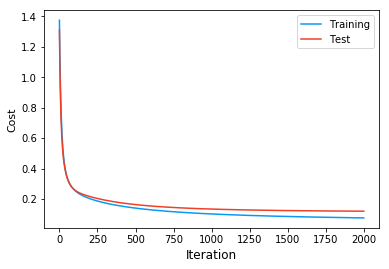

In [20]:
#plot errors hist
plt.plot(range(history['Iterations']),history['Error'],label='Training',c='xkcd:azure')
plt.plot(range(history['Iterations']),history['TestError'],label='Test',c='xkcd:tomato')
plt.ylabel('Cost',fontsize=11)
plt.xlabel('Iteration',fontsize=12)
plt.legend()
plt.savefig("error.png",dpi=300)

In [21]:
#plot accuracy hist
plt.figure(dpi=80)
plt.plot(range(history['Iterations']),history['Accuracy'],label="Trainig",c='xkcd:azure')
plt.plot(range(history['Iterations']),history['TestAccuracy'],label="Test",c='xkcd:tomato')
plt.ylabel('Accuracy',fontsize=11)
plt.xlabel('Iteration',fontsize=12)
plt.legend()
plt.savefig("acc.png",dpi=300)

In [22]:
#plot fpr/tpr
uni,cnt = np.unique(Y_train, return_counts=True)
fnr=np.divide(history['FalseNegatives'],cnt[1])
fpr=np.divide(history['FalsePositives'],cnt[0])
tpr=np.subtract(1,fnr)

plt.figure(dpi=80)
plt.plot(range(history['Iterations']),fpr,c='xkcd:orange',label="FPR")
plt.plot(range(history['Iterations']),tpr,c='xkcd:ocean',label="TPR")
plt.legend()
plt.xlabel('Iteraction',fontsize=12)
plt.savefig("rates.png",dpi=300)

In [23]:
probs=classifier.evaluate(X_train,Y_train)


Loss:  0.0757198552023069
Accuracy:  0.9733333333333334 

False Posivites:  4
False Negatives:  4 



# Evaluating with test data
----

In [24]:
#Calling the evaluate method to get the loss value together with p[i] values
predictions=classifier.evaluate(X_test,Y_test)

#it is possible to call the "predict method" as well, which do not compute the loss function or accuracy
#predictions=classifier.predict(X_test)


Loss:  0.11983464068906227
Accuracy:  0.9634464751958225 

False Posivites:  7
False Negatives:  7 

